# 0. Introduction

## 0.1. basic operations

In [1]:
import torch

In [8]:
x = torch.empty(3,2)
print(x)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])


In [10]:
x = torch.rand(1,2)
x

tensor([[0.3470, 0.0212]])

In [12]:
x = torch.ones(2,2)
x = torch.zeros(2,2)
x = torch.ones(2,2,dtype=torch.double)
x

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

In [14]:
x.size()

torch.Size([2, 2])

In [16]:
x = torch.tensor([1,2,3])
x

tensor([1, 2, 3])

In [18]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)
z = x + y
z

tensor([[0.6437, 0.9883],
        [0.0319, 0.2370]])
tensor([[0.7724, 0.3394],
        [0.9961, 0.6047]])


tensor([[1.4161, 1.3277],
        [1.0280, 0.8417]])

In [ ]:
z = torch.add(x,y)

In [19]:
#inplace addition
y.add_(x)
y

tensor([[1.4161, 1.3277],
        [1.0280, 0.8417]])

Ogni operazione che termina con "_" indica una inplace operation

In [ ]:
z = torch.sub(x,y)
z = torch.mul(x,y)
y.mul_(x)
z = x/y
z = torch.div(x,y)


In [22]:
# slicing operations
x = torch.rand(5,3)
print(x)
print(x[0,:])
print(x[1,1])

tensor([[0.5125, 0.2821, 0.4891],
        [0.0785, 0.4049, 0.4522],
        [0.7699, 0.0149, 0.1042],
        [0.5607, 0.2433, 0.7413],
        [0.7440, 0.1530, 0.3585]])
tensor([0.5125, 0.2821, 0.4891])
tensor(0.4049)


In [23]:
# restituisce l'elemento, ma solo 
# se è un tensore di un solo elemento
x[1,1].item()

0.40486085414886475

## 0.2. reshaping

In [27]:
y = x.view(15)
y

tensor([0.5125, 0.2821, 0.4891, 0.0785, 0.4049, 0.4522, 0.7699, 0.0149, 0.1042,
        0.5607, 0.2433, 0.7413, 0.7440, 0.1530, 0.3585])

In [31]:
y = y.view(-1,5)
y.shape

torch.Size([3, 5])

# 1. Numpy and Pytorch

## 1.1. convertions

In [32]:
import numpy as np

In [33]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [34]:
# se entrambi stanno sulla cpu, modificare uno
# cambierà l'altro

a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [35]:
a = np.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [36]:
a += 1
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## 1.2. cpu and gpu management

Questo accade solo se si sta sulla cpu

In [37]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cpu


In [38]:
x = torch.ones(5, device=device)
y = torch.ones(5)
# per spostarlo sulla gpu se è disponibile
y = y.to(device)

# l'operazione sarà più veloce
z = x + y

# non è possibile convertire gpu tensor
# in numpy, bisogna prima spostarlo sulla cpu
z = z.to("cpu")
z.numpy()


array([2., 2., 2., 2., 2.], dtype=float32)

In [ ]:
# servirà calcolare il gradiente per 
# quel tensore, questo serve nella fase
# di backpropagation
x = torch.ones(5, requires_grad=True)
print(x)

# 2. Autograd

## 2.1. basic operations

Serve per calcolare il gradiente

In [39]:
x = torch.rand(3,requires_grad=True) # di default è false
print(x)
# ogni volta che effettuaimo delle operazioni
# su un tensore che ha il gradiente abilitato
# verrà salvato il grafo delle operazioni
y = x+2
print(y)

'''
x ---
     ---- + ----- grad
2 ---              |
    <----------- backward

'''


tensor([0.0133, 0.3842, 0.8432], requires_grad=True)
tensor([2.0133, 2.3842, 2.8432], grad_fn=<AddBackward0>)


'\nx ---\n     ---- + ----- grad\n2 ---              |\n    <----------- backward\n\n'

In [40]:
z = y*y*2
print(z)

tensor([ 8.1071, 11.3690, 16.1679], grad_fn=<MulBackward0>)


presente mul backward

In [41]:
z = z.mean()
print(z)

tensor(11.8813, grad_fn=<MeanBackward0>)


In [42]:
z.backward() # dz/dx
print(x.grad)

tensor([2.6845, 3.1790, 3.7910])


Se non specificassimo requires_grad non potremmo calcolare il gradiente e non potremmo fare backpropagation

Il grad è ottenuto come la jacobiana della funzione

In [43]:
x = torch.rand(3,requires_grad=True) # di default è false
print(x)
y = x+2
print(y)
z = y*y*2
z = z.mean()
print(z)
z.backward() # dz/dx
print(x.grad)

tensor([0.9640, 0.1459, 0.2584], requires_grad=True)
tensor([2.9640, 2.1459, 2.2584], grad_fn=<AddBackward0>)
tensor(12.3271, grad_fn=<MeanBackward0>)
tensor([3.9520, 2.8612, 3.0112])


In [44]:
x = torch.rand(3,requires_grad=True) # di default è false
print(x)
y = x+2
print(y)
z = y*y*2
#z = z.mean()
print(z)
z.backward() # dz/dx
print(x.grad)

tensor([0.6553, 0.1038, 0.5915], requires_grad=True)
tensor([2.6553, 2.1038, 2.5915], grad_fn=<AddBackward0>)
tensor([14.1014,  8.8517, 13.4319], grad_fn=<MulBackward0>)


RuntimeError: grad can be implicitly created only for scalar outputs

Per gestire questi casi (quando z non è uno scalare (prima era così poiché avevamo calcolato z.mean())) è necessario aggiungere un vettore v di dimensione uguale a quella di x

In [45]:
x = torch.rand(3,requires_grad=True) # di default è false
print(x)
y = x+2
print(y)
z = y*y*2
v = torch.tensor([0.1,1.0,0.001],dtype=torch.float32)
z.backward(v) # dz/dx
print(x.grad)

tensor([0.5583, 0.7130, 0.9366], requires_grad=True)
tensor([2.5583, 2.7130, 2.9366], grad_fn=<AddBackward0>)
tensor([ 1.0233, 10.8520,  0.0117])


Solitamente, si effettua una funzione che riduce z a uno scalare

## 2.2. how to block the gradient

In [ ]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

In [46]:
x.requires_grad_(False) # inplace change
print(x)

tensor([0.5583, 0.7130, 0.9366])


In [49]:
x = torch.rand(3,requires_grad=True) 

In [50]:
y = x.detach()
y

tensor([0.7442, 0.7625, 0.2569])

In [51]:
with torch.no_grad():
    y = x + 2
    print(y)

tensor([2.7442, 2.7625, 2.2569])


## 2.3. empty the gradient

In [56]:
weights = torch.ones(4,requires_grad=True)
for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    print(weights.grad)
    # per evitare che il gradiente accumuli
    #weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [57]:
weights = torch.ones(4,requires_grad=True)
optimizer = torch.optim.SGD([weights],lr=0.01)
optimizer.step()
optimizer.zero_grad()

è necessario svuotare il gradiente prima di fare una nuova backpropagation

# 3. Backpropagation

LINEAR REGRESSION

y^ = w*x

loss = (y^ - y)^2 = (w*x - y)^2


Il computation graph tiene in considerazione le operazioni effettuate, nel caso della regressione lineare l'ultima operazione è ^2, la precedente è -, e quella ancora pria è *. Quindi il grafo risultante è:
* => - => ^2



In [58]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0,requires_grad=True)

In [59]:
# forward pass and compute the loss
y_hat = w*x
loss = (y_hat - y)**2
print(loss)

tensor(1., grad_fn=<PowBackward0>)


In [60]:
# backward pass
loss.backward()
print(w.grad)

tensor(-2.)


poi dovremmo aggiornare i pesi e passare alla prossima iterazione

# 4. gradient descent with autograd

## 4.1. Manual gradient descent

In [66]:
# f = w*x
# f = 2*x

X = np.array([1,2,3,4],dtype=np.float32)
Y = np.array([2,4,6,8],dtype=np.float32)

w = 0.0


In [67]:
# model prediction 
def forward(x):
    return w*x

# loss = MSE; for the linear regression
def loss(y,y_predicted):
    return ((y_predicted - y)**2).mean()

# gradient
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x - y)

def gradient(x,y,y_predicted):
    return np.dot(2*x,y_predicted-y).mean()


In [68]:
print(f'Prediction before training: f(5) = {forward(5):.3f}')

Prediction before training: f(5) = 0.000


In [71]:
# training
learning_rate = 0.01
n_iters = 20

w = 0.0

for epoch in range(n_iters):
    y_pred = forward(X)
    # loss
    print(f"loss : {loss(Y,y_pred):.10f}")
    # gradient
    vt = gradient(X,Y,y_pred)
    # update weights
    w = w-learning_rate*vt

loss : 30.0000000000
loss : 4.7999992371
loss : 0.7680001855
loss : 0.1228799969
loss : 0.0196608342
loss : 0.0031456952
loss : 0.0005033241
loss : 0.0000805319
loss : 0.0000128844
loss : 0.0000020614
loss : 0.0000003297
loss : 0.0000000528
loss : 0.0000000084
loss : 0.0000000014
loss : 0.0000000002
loss : 0.0000000000
loss : 0.0000000000
loss : 0.0000000000
loss : 0.0000000000
loss : 0.0000000000


In [76]:
print(f'Prediction after training: f(5) = {forward(5):.3f}')

Prediction after training: f(5) = 10.000


## 4.2. using autograd

Now let's use pytorch

In [83]:
X = torch.tensor([1,2,3,4],dtype=torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)

w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

# model prediction 
def forward(x):
    return w*x

# loss = MSE; for the linear regression
def loss(y,y_predicted):
    return ((y_predicted - y)**2).mean()

# training
learning_rate = 0.01
n_iters = 100

history = []

for epoch in range(n_iters):
    y_pred = forward(X)
    # loss
    l = loss(Y,y_pred)
    history.append(l.detach().numpy())
    if epoch%10 == 0:
        print(f"loss : {l:.10f}")
    l.backward()

    # update weights
    with torch.no_grad():
        w -=learning_rate*w.grad
    w.grad.zero_()

print(f'Prediction after training: f(5) = {forward(5):.3f}')

loss : 30.0000000000
loss : 1.1627856493
loss : 0.0450688973
loss : 0.0017468547
loss : 0.0000677049
loss : 0.0000026244
loss : 0.0000001018
loss : 0.0000000040
loss : 0.0000000001
loss : 0.0000000000
Prediction after training: f(5) = 10.000


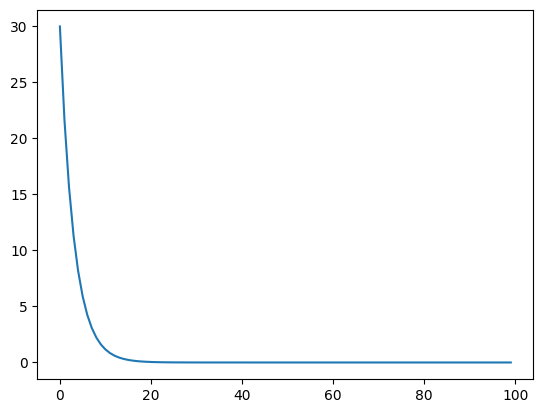

In [85]:
import matplotlib.pyplot as plt
plt.plot(history)

# 5. Training pipeline

Solitamente vi sono 3 step

1. Design model (input, output size, forward pass)
2. loss e optimizer
3. training loop
    1. forward pass: compute prediction
    2. backward pass: gradients
    3. update weights

In [86]:
import torch.nn as nn

## 5.1. Basic version

w : 0.407  loss : 24.6987037659
w : 2.006  loss : 0.0000538836
w : 2.005  loss : 0.0000296610
w : 2.003  loss : 0.0000163283
w : 2.003  loss : 0.0000089994
w : 2.002  loss : 0.0000049532
w : 2.001  loss : 0.0000027351
w : 2.001  loss : 0.0000015058
w : 2.001  loss : 0.0000008455
w : 2.001  loss : 0.0000004570
w : 2.000  loss : 0.0000002483
w : 2.000  loss : 0.0000001377
w : 2.000  loss : 0.0000000784
w : 2.000  loss : 0.0000000462
w : 2.000  loss : 0.0000000283
w : 2.000  loss : 0.0000000182
w : 2.000  loss : 0.0000000123
w : 2.000  loss : 0.0000000089
w : 2.000  loss : 0.0000000068
w : 2.000  loss : 0.0000000054
Prediction after training: f(5) = 10.000


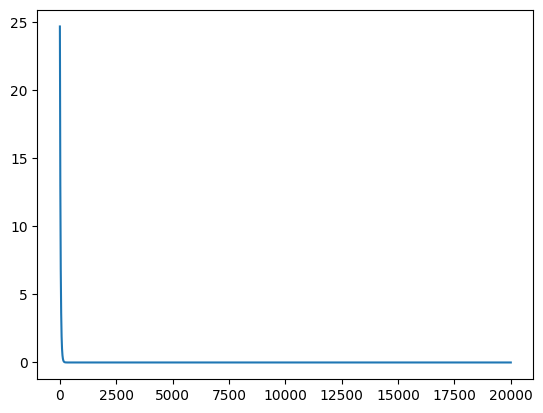

In [108]:
X = torch.tensor([1,2,3,4],dtype=torch.float32)
X = X.reshape(-1,1)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)
Y = Y.reshape(-1,1)

X_test= torch.tensor([5],dtype=torch.float32)

n_samples, n_features = X.shape
model = nn.Linear(n_features,n_features)


# loss = MSE; for the linear regression
loss = nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

# training
n_iters = 20000
history = []

for epoch in range(n_iters):
    y_pred = model(X)
    # loss
    l = loss(Y,y_pred)
    history.append(l.detach().numpy())
    
    l.backward()

    # update weights
    optimizer.step()
    optimizer.zero_grad()

    if epoch%1000 == 0:
        [w,b] = model.parameters()
        print(f"w : {w[0][0].item():.3f}  loss : {l:.10f}")

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')
plt.plot(history)

## 5.2. Using nn.Module

w : -0.063  loss : 32.7150306702
w : 1.878  loss : 0.0214842185
w : 1.933  loss : 0.0064856173
w : 1.963  loss : 0.0019579004
w : 1.980  loss : 0.0005911084
w : 1.989  loss : 0.0001785100
w : 1.994  loss : 0.0000539444
w : 1.997  loss : 0.0000163191
w : 1.998  loss : 0.0000049440
w : 1.999  loss : 0.0000014992
w : 1.999  loss : 0.0000004549
w : 2.000  loss : 0.0000001394
w : 2.000  loss : 0.0000000415
w : 2.000  loss : 0.0000000136
w : 2.000  loss : 0.0000000052
w : 2.000  loss : 0.0000000025
w : 2.000  loss : 0.0000000015
w : 2.000  loss : 0.0000000010
w : 2.000  loss : 0.0000000009
w : 2.000  loss : 0.0000000008
Prediction after training: f(5) = 10.000


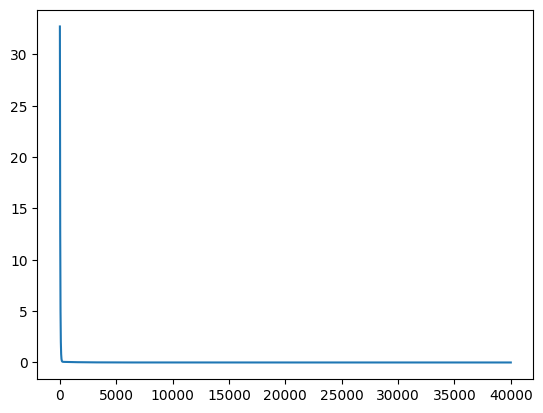

In [111]:
X = torch.tensor([1,2,3,4],dtype=torch.float32)
X = X.reshape(-1,1)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)
Y = Y.reshape(-1,1)

X_test= torch.tensor([5],dtype=torch.float32)

n_samples, n_features = X.shape


class LiearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LiearRegression,self).__init__()
        self.lin = nn.Linear(input_dim,output_dim)
    def forward(self,x):
        return self.lin(x)

model = LiearRegression(n_features,n_features)

# loss = MSE; for the linear regression
loss = nn.MSELoss()
# optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

# training
n_iters = 20000*2
history = []

for epoch in range(n_iters):
    y_pred = model(X)
    # loss
    l = loss(Y,y_pred)
    history.append(l.detach().numpy())
    
    l.backward()

    # update weights
    optimizer.step()
    optimizer.zero_grad()

    if epoch%2000 == 0:
        [w,b] = model.parameters()
        print(f"w : {w[0][0].item():.3f}  loss : {l:.10f}")

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')
plt.plot(history)

# 6. Linear regression

In [112]:
from sklearn import datasets

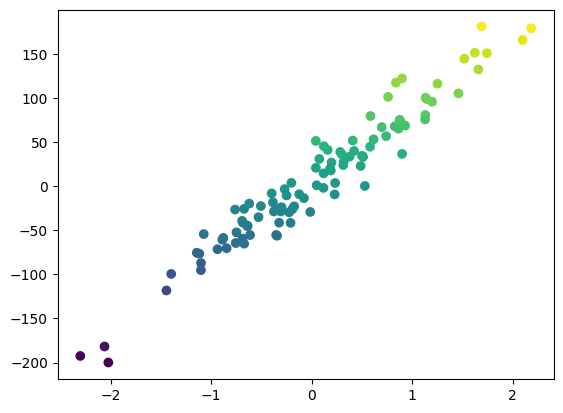

In [119]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
plt.scatter(X_numpy, y_numpy, c=y_numpy, cmap='viridis')
plt.show()
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(-1,1)

n_samples, n_features = X.shape


In [133]:
# model 
model = nn.Linear(n_features,n_features)
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)


In [135]:
# training loop
n_iters = 1000
history = []

for epoch in range(n_iters):
    y_predicted = model(X)
    loss = criterion(y_predicted,y)
    history.append(loss.detach().numpy())
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    # zero grad
    optimizer.zero_grad()

    if epoch%100 == 0:
        print(f"epoch {epoch+1}/{n_iters}, loss = {loss.item():.4f}")


epoch 1/1000, loss = 5661.2607
epoch 101/1000, loss = 551.5566
epoch 201/1000, loss = 342.0354
epoch 301/1000, loss = 332.9853
epoch 401/1000, loss = 332.5861
epoch 501/1000, loss = 332.5684
epoch 601/1000, loss = 332.5676
epoch 701/1000, loss = 332.5675
epoch 801/1000, loss = 332.5676
epoch 901/1000, loss = 332.5676


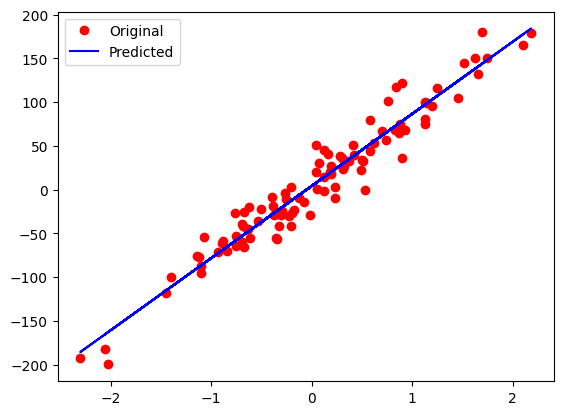

In [136]:
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
# add legend
plt.legend(['Original', 'Predicted'])
plt.show()


# 7. Logistic regression

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [141]:
# prepare data
bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target
n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1234)

# scale 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

n_samples, n_features = X_train.shape